In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
#from load_data import load_categorical_more_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
import time
import seaborn as sns
from xgboost import XGBRegressor, plot_tree
from scipy import stats

In [9]:
import openpyxl 
import os

In [10]:
# def MinMaxNormal(df):
#     normalized_df=(df-df.min())/(df.max()-df.min())
#     return normalized_df

In [11]:
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true=np.array(y_true)
#     y_pred=np.array(y_pred)
#     MSPE = (sum((MinMaxNormal(y_true)-MinMaxNormal(y_pred))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
#     MSPE = MSPE*100
#     return np.abs(MSPE)

In [12]:
# """
# Use Decision Tree to fit the relationship between 
# homeless_real_value and other variables, except 
# no_longer_homeless, prevention_duty, and relief duty.
# """

# #Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2020,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

# #affordableRent_start,social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [13]:
data_table=categorical_data.drop(labels='Local',axis=1)
data_table=data_table.drop(labels='Local_Authority_code',axis=1)
data_table=data_table.drop(labels='Local_Authority_name',axis=1)
#data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
#data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='C_D_property_counts',axis=1)
#data_table=data_table.drop(labels='E_F_property_counts',axis=1)
#data_table=data_table.drop(labels='G_H_property_counts',axis=1)
#data_table=data_table.drop(labels='median_houses_2020',axis=1)
#data_table=data_table.drop(labels='median_earning_2020',axis=1)
#data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
#data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total(Completions)',axis=1)
#data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
#data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [36]:
raw_data = pd.read_excel(r"./Data/all_in_one_Categorical_imputed.xlsx")

raw_data = raw_data.drop(columns=['Local', 
                                  'Local_Authority_code', 
                                  'Local_Authority_name',
                                 'Total_households_with_support_needs',
                                 'Homeless_(including_intentionally_homeless)','Total_secured_accommodation',
                                 'Total(Starts_on_Site)','Total_Affordable(Starts_on_Site)',
                                 'Total(Completions)'])

raw_data = raw_data.drop(columns=['Threatened_with_homelessness_within_56_days_Prevention_duty_owed',
                                  'Homeless_Relief_duty_owed4'])

In [37]:
raw_data.columns

Index(['Total_owed_a_prevention_or_relief_duty',
       'Number_of_households_in_area4(000s)',
       'Size_of_social_housing_waiting_list_2020', '2020_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Intermediate_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Affordable_Rent(Completions)', 'Social_Rent(Completions)',
       'Intermediate_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)',
       'Total_Affordable(Completions)', 'Market(Starts_on_Site)',
       'Market(Completions)', 'A_B_property_counts', 'C_D_property_counts',
       'E_F_property_counts', 'G_H_property_counts', 'median_houses_2020',
       'median_earning_2020', 'ratio_by_medians_2020',
       'lower_quatile_houses_2020', 'lower_quatile_earning_2020',
       'ratio_by_lower_quatile_2020'],
      dtype='object')

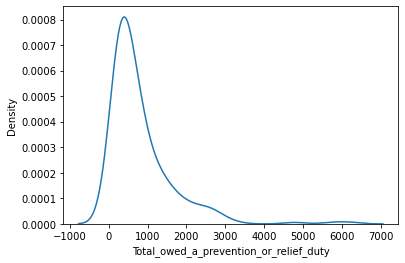

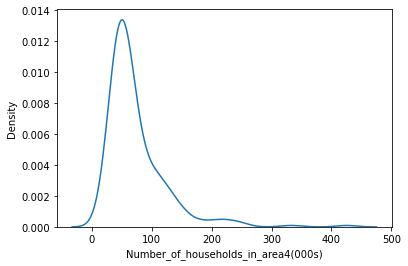

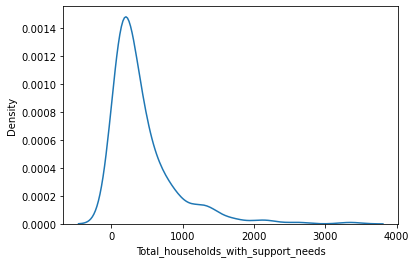

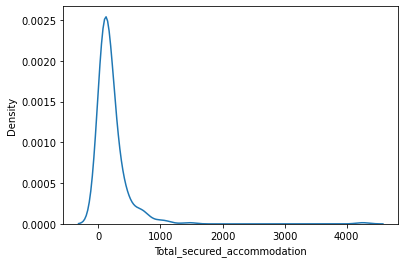

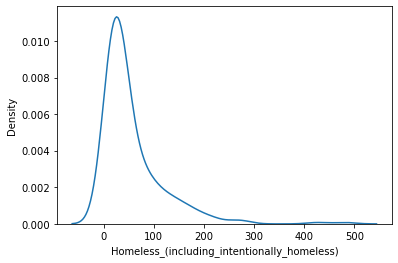

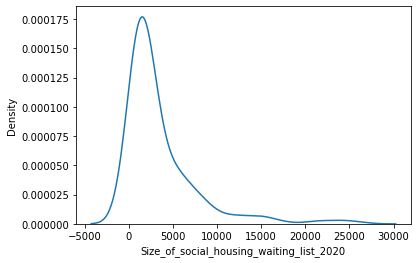

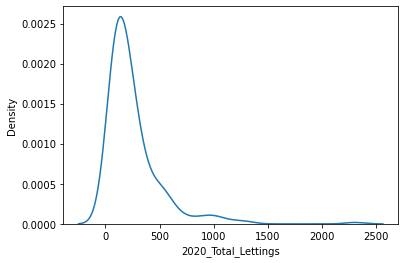

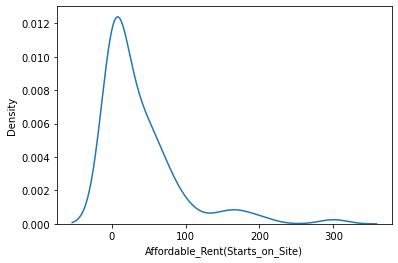

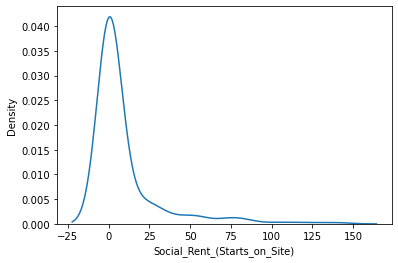

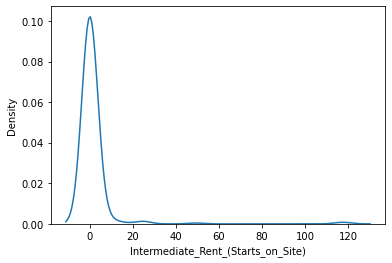

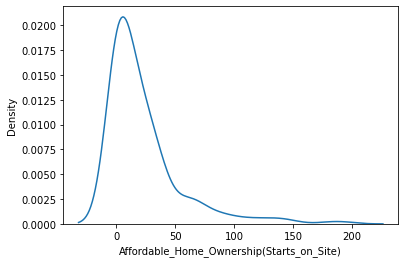

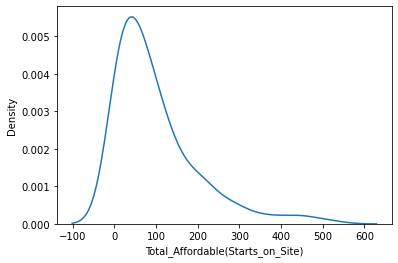

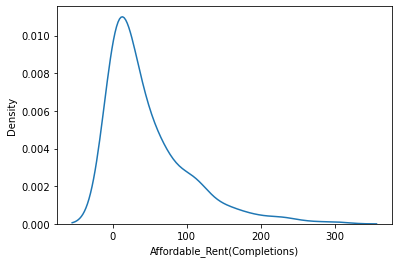

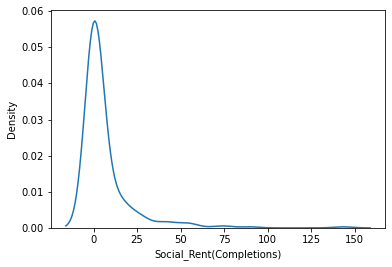

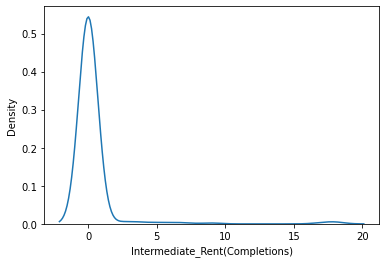

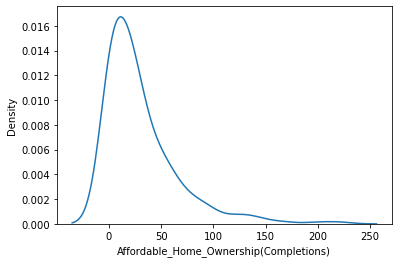

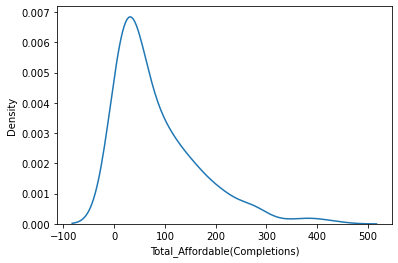

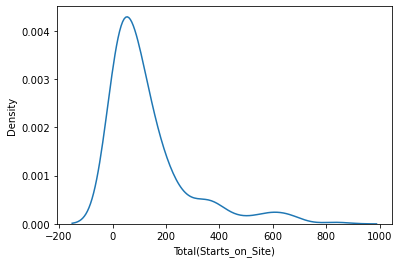

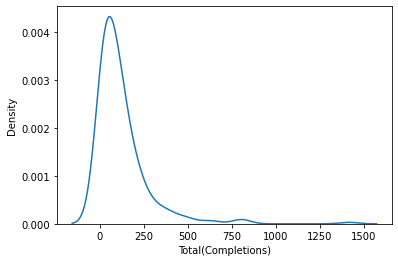

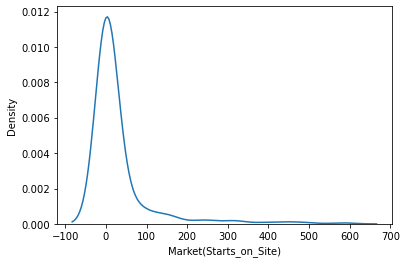

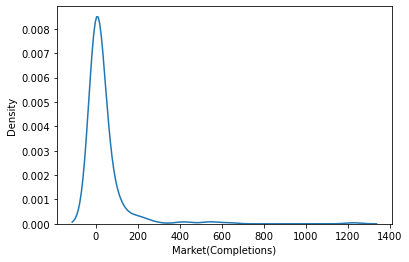

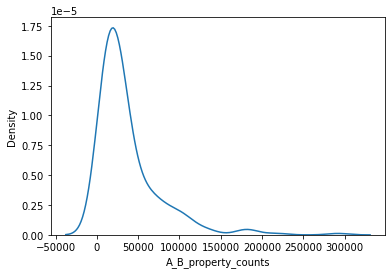

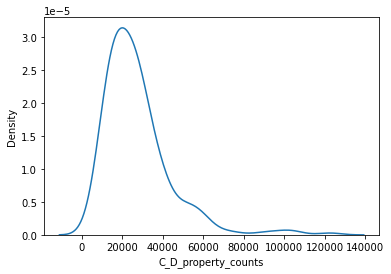

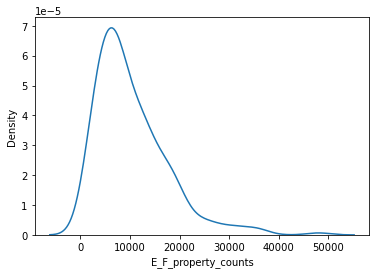

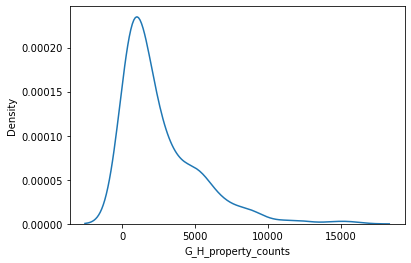

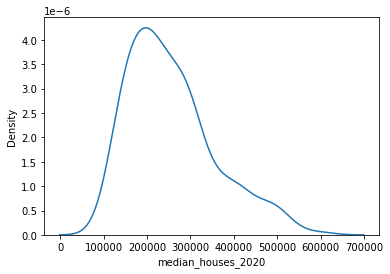

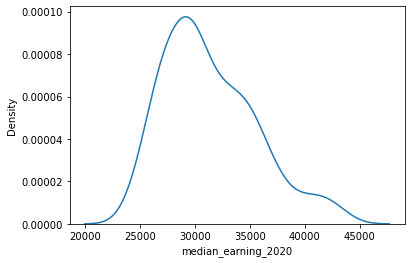

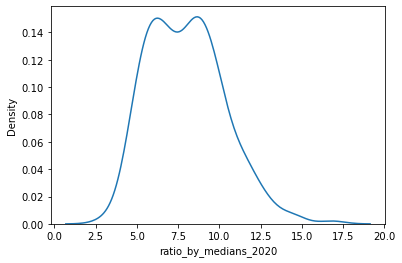

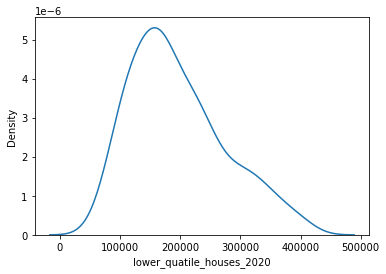

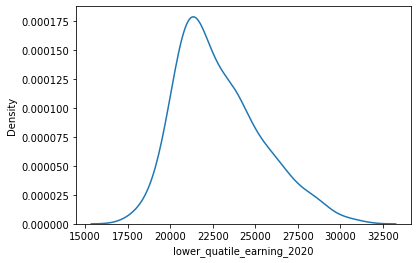

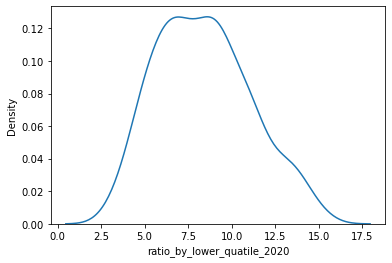

In [15]:
for i in range(raw_data.columns.shape[0]):
    sns.kdeplot(raw_data[raw_data.columns[i]])
    plt.show()

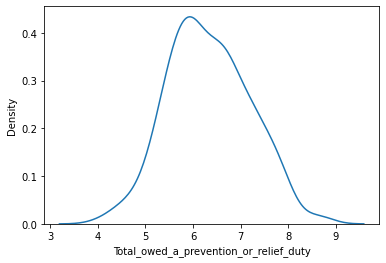

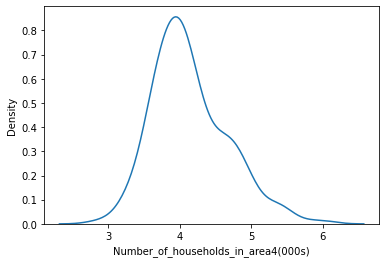

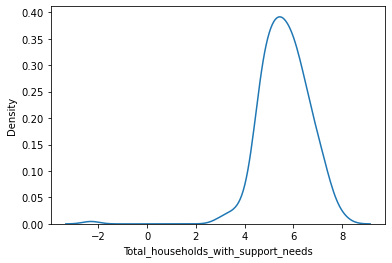

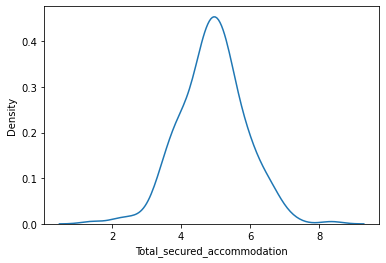

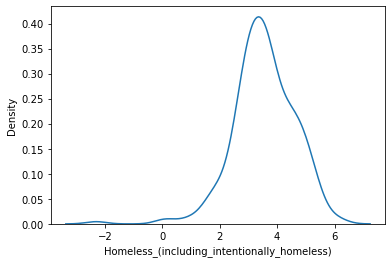

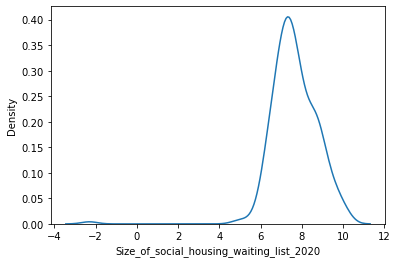

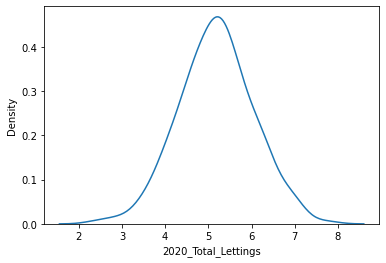

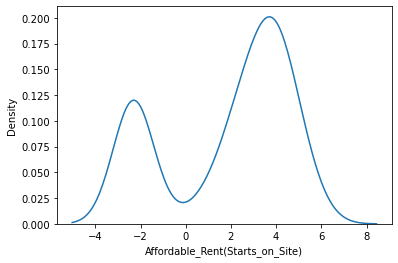

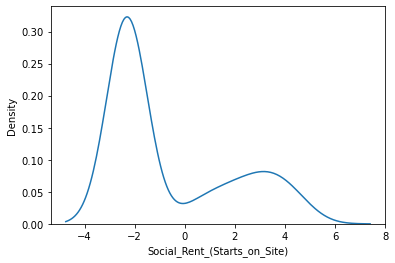

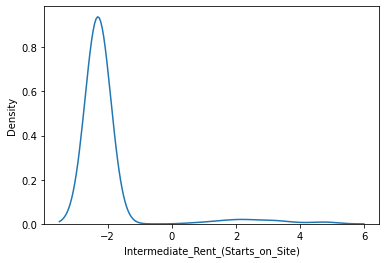

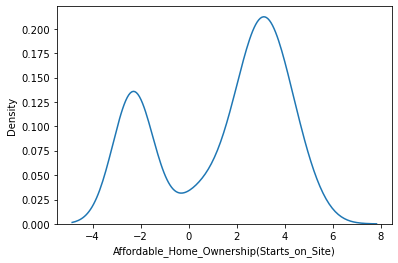

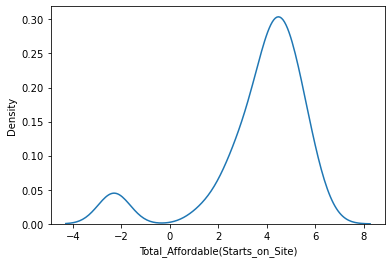

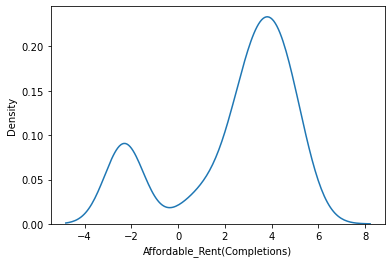

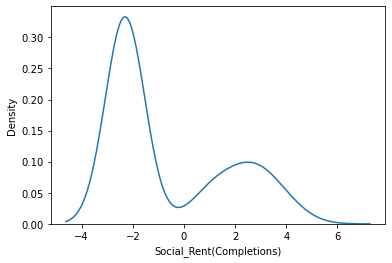

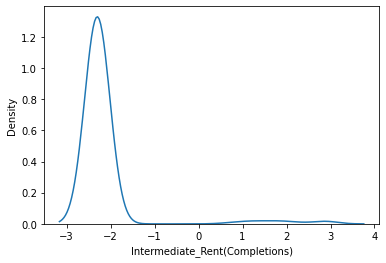

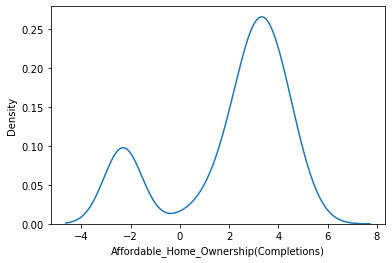

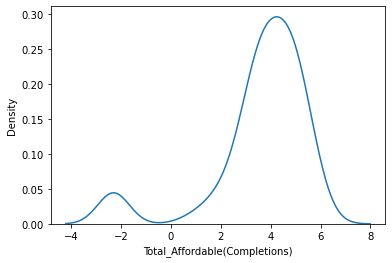

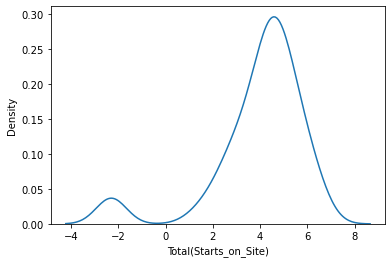

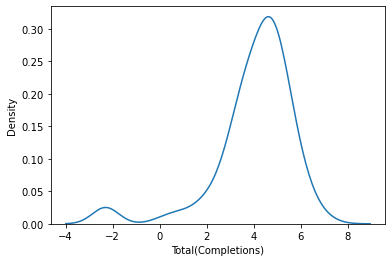

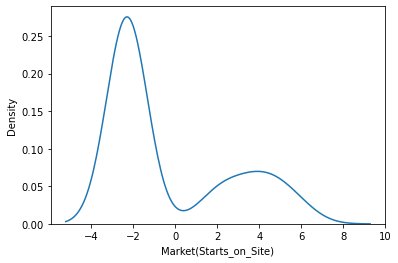

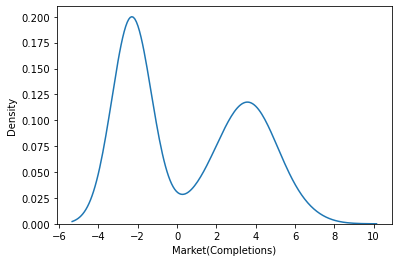

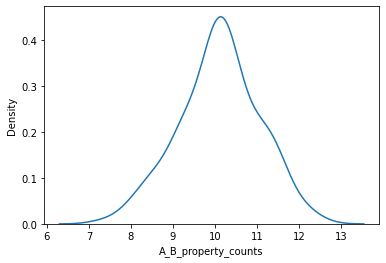

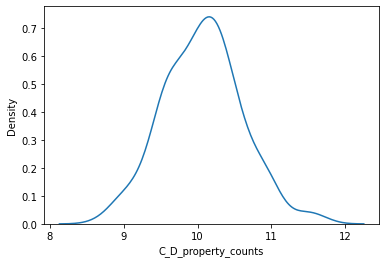

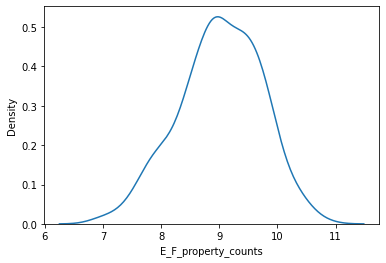

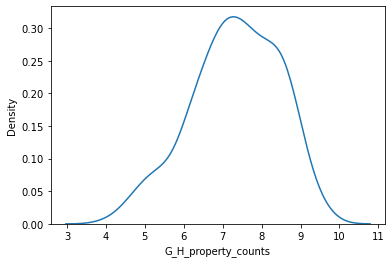

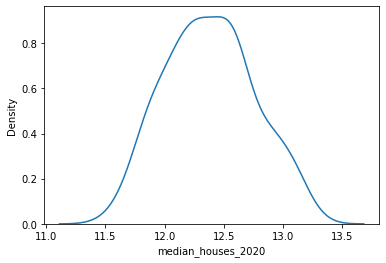

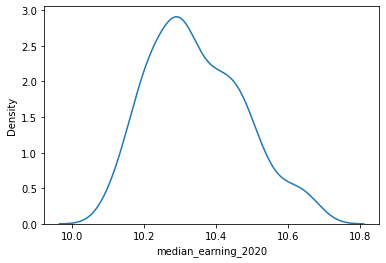

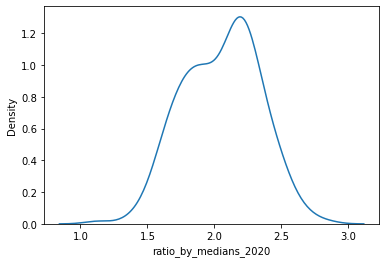

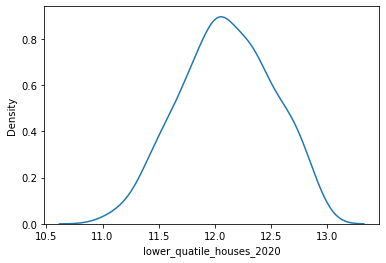

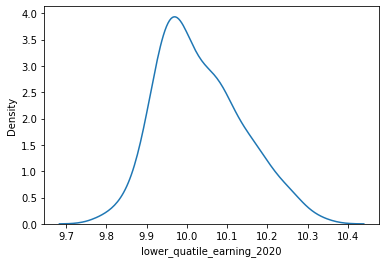

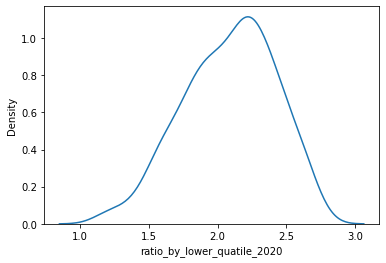

In [16]:
# pt = PowerTransformer(standardize=False)
for i in range(raw_data.columns.shape[0]):
#     this_data = (raw_data[raw_data.columns[i]].values + 0.1).reshape(-1,1)
#     this_data = pt.fit_transform(this_data)
    
#     this_data_df = pd.DataFrame(this_data, columns=[raw_data.columns[i]])
#     sns.kdeplot(this_data_df[raw_data.columns[i]])
    sns.kdeplot(np.log(raw_data[raw_data.columns[i]] + 0.1) )
    plt.show()

Skewness: 2.928491
Kurtosis: 12.620908


<AxesSubplot:xlabel='Total_owed_a_prevention_or_relief_duty', ylabel='Density'>

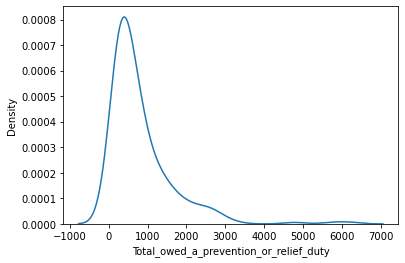

In [17]:
this_column = raw_data[raw_data.columns[0]]

mu = this_column.mean()
std = this_column.std()

# stats.kstest(this_column, 'norm', (mu, std))
# stats.normaltest(this_column, nan_policy='propagate')
print("Skewness: %f" % this_column.skew())
print("Kurtosis: %f" % this_column.kurt())
sns.kdeplot(this_column)

In [18]:
# sns.pairplot(data_table)

In [19]:
# SelectKBest(chi2, k=8).fit_transform(feature_space, feature_class)

In [20]:

# data_scaled = StandardScaler().fit_transform(data_table.values)
# data_scaled_df = pd.DataFrame(data_scaled, index=data_table.index, columns=data_table.columns)


In [21]:
data_trans = np.log(raw_data + 0.1) 

In [22]:
data_trans

,Total_owed_a_prevention_or_relief_duty,Number_of_households_in_area4(000s),Total_households_with_support_needs,Total_secured_accommodation,Homeless_(including_intentionally_homeless),Size_of_social_housing_waiting_list_2020,2020_Total_Lettings,Affordable_Rent(Starts_on_Site),Social_Rent_(Starts_on_Site),Intermediate_Rent_(Starts_on_Site),...,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,median_houses_2020,median_earning_2020,ratio_by_medians_2020,lower_quatile_houses_2020,lower_quatile_earning_2020,ratio_by_lower_quatile_2020
0,6.893758,4.046169,6.313729,5.627981,3.222868,8.493740,6.306458,3.613617,-2.302585,-2.302585,...,10.694897,9.703212,8.157686,6.380292,11.805596,10.160031,1.663926,11.350349,9.936443,1.437463
1,6.257859,4.143436,5.613493,4.927978,1.960095,7.981426,6.196648,3.852273,-2.302585,-2.302585,...,10.604853,9.909971,8.393918,6.064018,11.794339,10.200331,1.613430,11.461581,9.924471,1.558145
2,7.695803,4.419912,7.609912,6.950911,3.222868,8.445289,6.311916,2.572612,-2.302585,-2.302585,...,10.864562,10.171608,9.075677,7.333088,11.904968,10.291979,1.633154,11.574962,9.987603,1.607436
3,6.566813,3.879706,6.278709,4.935193,2.895912,7.254955,5.746523,3.586293,-2.302585,-2.302585,...,10.428811,9.474250,8.416289,6.477126,11.884145,10.206813,1.695616,11.512426,9.872157,1.660131
4,7.493373,4.515202,7.236411,6.129268,4.467057,8.495581,5.717357,4.625953,0.741937,3.893859,...,10.772060,10.352335,9.400969,7.965580,12.180755,10.308489,1.887070,11.827737,9.928331,1.913977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,7.776157,4.684259,6.883565,6.888674,5.075799,9.362211,4.478473,-2.302585,-2.302585,-2.302585,...,10.220853,11.025167,9.711122,8.599713,13.159178,10.479823,2.686486,12.899220,10.172717,2.733068
249,6.057018,4.230709,5.242276,4.692265,4.191169,7.941687,4.963544,-2.302585,-2.302585,-2.302585,...,8.316325,10.488495,10.057928,8.566002,13.106234,10.627748,2.486572,12.840001,10.335111,2.512846
250,6.311916,4.372267,5.231643,5.861071,3.640214,9.118784,4.489759,-2.302585,-2.302585,-2.302585,...,9.175759,10.849533,9.846922,8.675922,13.091904,10.646593,2.453588,12.853176,10.238891,2.621766
251,7.569463,4.897235,6.816845,5.945682,4.625953,9.959494,5.595083,-2.302585,-2.302585,-2.302585,...,10.288753,11.147499,10.488495,8.616151,13.138729,10.643974,2.503074,12.899220,10.313711,2.593013


In [23]:
X = raw_data.iloc[:, raw_data.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
y = raw_data.iloc[:, raw_data.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

## Single run

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

xgb_model = XGBRegressor().fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9095987384222536


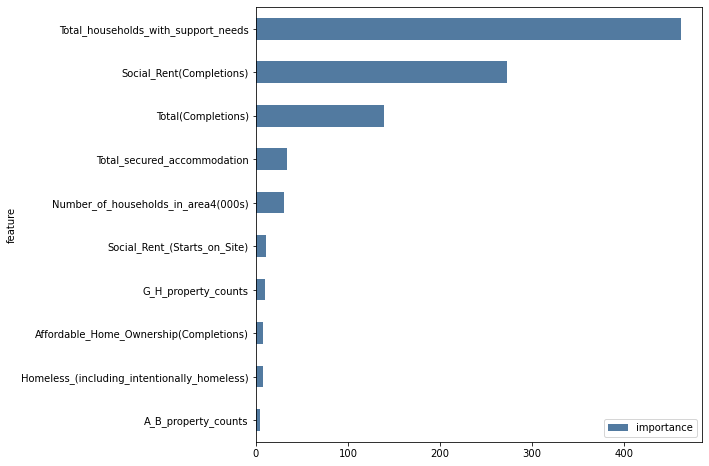

In [25]:
importances_values = xgb_model.feature_importances_
importances = pd.DataFrame(importances_values, columns=["importance"])
feature_data = pd.DataFrame(X_train.columns, columns=["feature"])
importance = pd.concat([feature_data, importances], axis=1)

importance = importance.sort_values(["importance"], ascending=True)
importance["importance"] = (importance["importance"] * 1000).astype(float)
importance = importance.sort_values(["importance"])
importance.set_index('feature', inplace=True)
importance[-10:].plot.barh(color='#527aa0', rot=0, figsize=(8, 8))
plt.legend(loc="lower right")
plt.show()

## Averaged Result after 20 Runs

In [26]:
accuracy_list = []

importances = pd.DataFrame(X_train.columns, columns=["feature"])
features = pd.DataFrame(X_train.columns, columns=["feature"])

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)

    xgb_model = XGBRegressor().fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    importances_values = xgb_model.feature_importances_
    
    columns_name = "importance" + str(i)
    importance = pd.DataFrame(importances_values, columns=[columns_name])
    importances = pd.concat([importance, importances], axis=1)
    importances = importances.sort_values([columns_name], ascending=True)
    
#     thisImportance =  pd.concat([features, importance], axis=1)
    
#     thisImportance = thisImportance.sort_values([columns_name], ascending=True)
#     thisImportance[columns_name] = (thisImportance[columns_name]).astype(float)

#     thisImportance[-10:].plot.barh(x='feature', y=columns_name, color=#527aa0, rot=0, figsize=(8, 8))
#     plt.legend(loc="lower right")
#     plt.show()


In [27]:
print("The mean r-2 score is %f" %np.mean(accuracy_list))

The mean r-2 score is 0.791574


In [30]:
importances_mean = importances.drop(columns='feature').mean(axis = 1)

features = pd.DataFrame(X_train.columns, columns=["feature"])
importances_mean = pd.DataFrame(importances_mean, columns=["importances_mean"])
importance_f = pd.concat([features, importances_mean], axis=1)

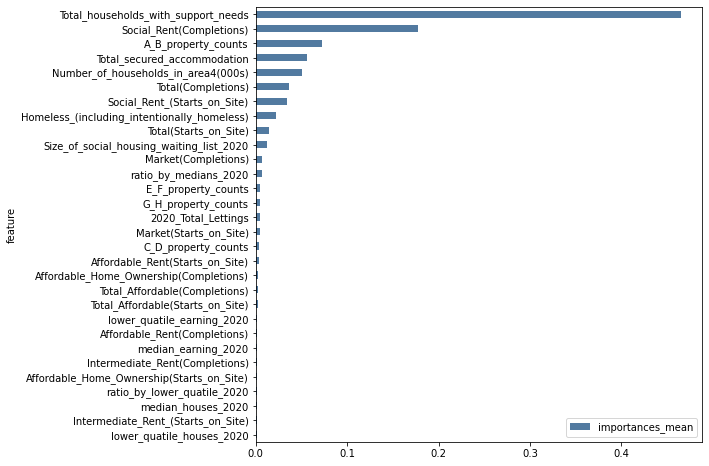

In [31]:
# thisImportance = thisImportance.sort_values([columns_name], ascending=True)
importance_f["importances_mean"] = (importance_f["importances_mean"] ).astype(float)
importance_f = importance_f.sort_values(["importances_mean"], ascending=True)

importance_f.plot.barh(x='feature', y="importances_mean", color='#527aa0', rot=0, figsize=(8, 8))
plt.legend(loc="lower right")
plt.show()